In [84]:
# Exercise 1.1.2

import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fmin
%matplotlib inline

def get_probability_distribution(x, alpha, beta):
    return beta/(np.pi*(beta**2+(x-alpha)**2))

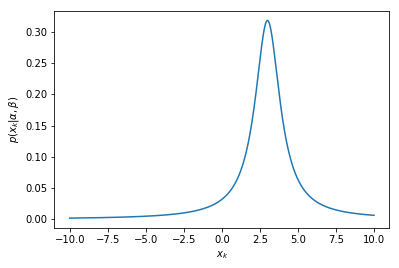

In [25]:
x = np.linspace(-10, 10, num=1000) 
probs = get_probability_distribution(x, 3, 1) 
plt.xlabel(r'$x_k$')
plt.ylabel(r'$p(x_k|\alpha, \beta)$')
plt.plot(x, probs)
plt.savefig('1_1_2.png')
plt.show()

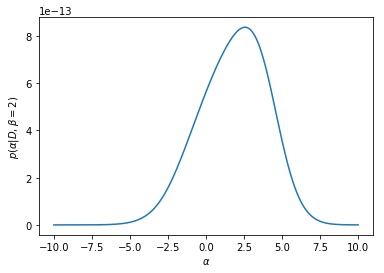

Mean of the data: 1.0200000000000002
Max likelihood value 8.366202446450113e-13 at position 628.
Alpha value which maximizes likelihood: 2.5725725725725717


In [51]:
# Exercise 1.1.4

# 10 points in km
data = np.array([3.6, 7.7, -2.6, 4.9, -2.3, 0.2, -7.3, 4.4, 7.3, -5.7])
# distance beta from the shore is known to be 2 km
beta = 2
alpha_list = np.linspace(-10, 10, num=1000)

def get_probability_1_1_4(x, alpha, beta):
    return np.product(beta/(np.pi*beta**2+(x-alpha)**2))


likelihoods = [get_probability_1_1_4(data, alpha, beta) for alpha in alpha_list]
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$p(\alpha|D, \beta = 2)$')
plt.plot(alpha_list, likelihoods)
plt.savefig('1_1_4.png')
plt.show()

print("Mean of the data: {}".format(np.mean(data)))

max_likelihood_index = np.argmax(likelihoods)
max_likelihood_value = np.max(likelihoods)

print("Max likelihood value {} at position {}.".format(max_likelihood_value, max_likelihood_index))
print("Alpha value which maximizes likelihood: {}".format(alpha_list[max_likelihood_index]))

In [52]:
# Exercise 1.2.1

alpha_t = np.random.uniform(0, 10) 
beta_t = np.random.uniform(2, 4)

print(alpha_t)
print(beta_t)

5.0220641275193785
2.436561583744695


In [68]:
# Exercise 1.2.2
beta_t = 2.436
alpha_t = 5.022

def position(angle, alpha, beta): 
    return beta * np.tan(angle) + alpha

N_points = 500
angles = np.random.uniform(-np.pi/2, np.pi/2, N_points)
positions = [position(angle, alpha_t, beta_t) for angle in angles]

print(positions)


[7.92303189170562, 2.3789257367710817, 9.7481762621589, 9.36912704981736, -1.7821208628963552, 3.539993600150079, 3.2453616366041436, 7.788756534860658, 5.641471981643049, -31.040182846413636, 7.207476041822229, 26.98991999986022, 4.979477482259711, 7.117333939434468, 1.949804190259118, 12.49534582857757, 6.4270819732630144, 5.971631500443296, 6.485263002432406, 4.3144946978767225, 5.190321017488507, 2.3082277932973736, -6.484130226065709, 18.392404321777363, 8.960596477837887, 8.098845203240327, -0.5040308205374977, 2.623944149661285, 2.1807155500107847, 6.167169469377823, 6.321240661537037, -46.23785731815894, -67.08822681214323, 12.230493340429812, 0.0871485232741449, -3.3766453979149365, -37.58056394513356, 8.267357383794554, 3.6659295133247367, -0.5346031895503351, 3.8319198209767618, 8.75850937822247, 3.8673123011642976, -57.16736182628346, -29.437509074222426, 12.51105595431466, 3.4468991712398998, 2.034017795372619, 4.835198407094151, 3.5518258793051354, 1.8702014771964244, 6.4

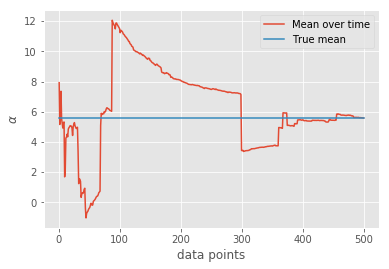

Mean of the data points: 5.579384528840819


In [70]:
# Exercise 1.2.3

mus = [np.mean(positions[:i + 1]) for i in range(N_points)]
mean = [np.mean(positions)] * (N_points)
X = np.arange(1, N_points + 1)
plt.plot(X, mus, label='Mean over time')
plt.plot(X, mean, label='True mean')
plt.xlabel('data points')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.savefig('1_2_3.png', bbox_inches='tight', dpi=300)
plt.show()

print("Mean of the data points: {}".format(np.mean(positions)))

/Users/cschmidl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/cschmidl/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/proj3d.py:141: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w
/Users/cschmidl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


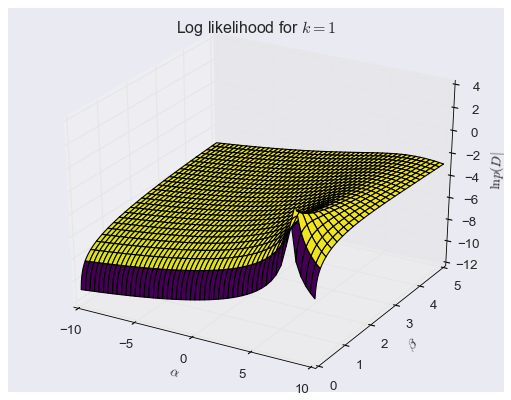

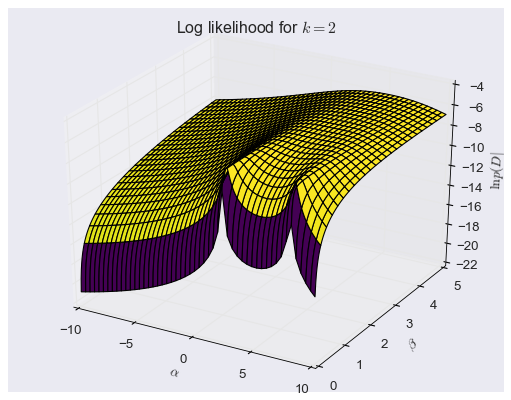

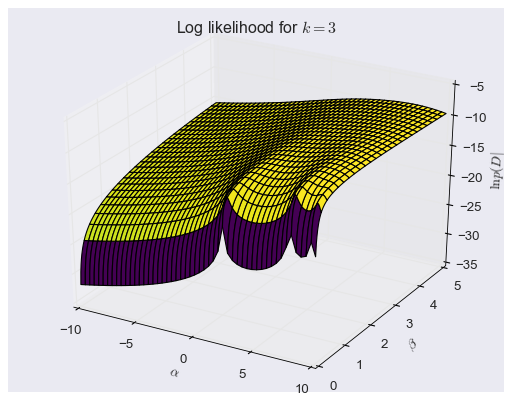

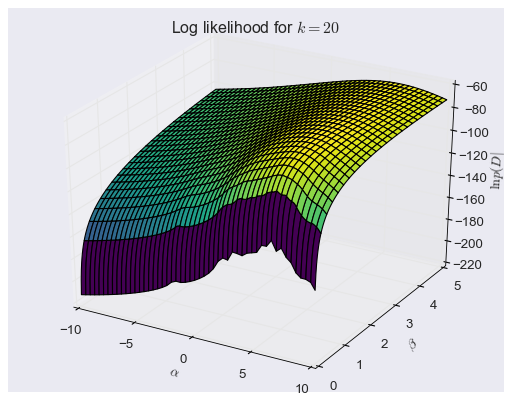

In [83]:
# Exercise 1.3.2

arrived_datapoints = [1, 2, 3, 20]
alpha_list, beta_list = np.meshgrid(np.linspace(-10, 10, num=500), np.linspace(0, 5, num=250))
plt.style.use('classic')

for k in arrived_datapoints:
    x = positions[:k]
    likelihood = k * np.log(beta_list/np.pi)
    for loc in x:
        likelihood -= np.log(beta_list**2 + (loc - alpha_list)**2)
        
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(alpha_list, beta_list, likelihood, cmap=plt.cm.viridis, vmin=-200, vmax=likelihood.max())
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$\beta$')
    ax.set_zlabel('$\ln p(D | \alpha, \beta)$')
    plt.title('Log likelihood for $k = {}$'.format(k))
    plt.savefig('1_3_2_{}.png'.format(k), bbox_inches='tight', dpi=300)
    plt.show()

In [95]:
# Exercise 1.3.3

def log_likelihood(params, positions):
    alpha, beta = params
    likelihood = len(positions) * np.log(beta/np.pi)
    for loc in positions:
        likelihood -= np.log(beta**2 + (loc - alpha)**2)
    return -likelihood
    
def plot_maximize_log_likelihood(data, alpha_t, beta_t):
    alpha_list, beta_list = [], []
    x = np.arange(len(data))
    for k in x:
        [alpha, beta] = fmin(log_likelihood, (0, 1), args=(data[:k],))
        alpha_list.append(alpha)
        beta_list.append(beta)
    
    plt.style.use('ggplot')
    plt.plot(x,alpha_list,label=r'$\alpha$')
    plt.plot(x,beta_list,label=r'$\beta$')
    plt.plot(x,[alpha_t]*len(data),label=r'$\alpha_t$')
    plt.plot(x,[beta_t]*len(data),label=r'$\beta_t$')
    plt.xlabel('$k$')
    plt.ylabel('positions')
    plt.legend()
    plt.savefig('1_3_3.png',bbox_inches='tight',dpi=300)
    plt.show()

    print(alpha_list[-1], beta_list[-1])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: 5.714931
         Iterations: 79
         Function evaluations: 158
Optimization terminated successfully.
         Current function value: 8.177423
         Iterations: 82
         Function evaluations: 156
Optimization terminated successfully.
         Current function value: 9.671256
         Iterations: 79
         Function evaluations: 149
Optimization terminated successfully.
         Current function value: 15.392991
         Iterations: 80
         Function evaluations: 156
Optimization terminated successfully.
         Current function value: 18.958259
         Iterations: 80
         Function evaluations: 148
Optimization terminated successfully.
         Current function value: 21.543535
         Iterations: 72
         Function evaluations: 140
Optimization terminated s

/Users/cschmidl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """



         Current function value: 79.240141
         Iterations: 73
         Function evaluations: 141
Optimization terminated successfully.
         Current function value: 82.226575
         Iterations: 78
         Function evaluations: 151
Optimization terminated successfully.
         Current function value: 84.780088
         Iterations: 71
         Function evaluations: 139
Optimization terminated successfully.
         Current function value: 88.924985
         Iterations: 78
         Function evaluations: 146
Optimization terminated successfully.
         Current function value: 91.989717
         Iterations: 77
         Function evaluations: 148
Optimization terminated successfully.
         Current function value: 95.129904
         Iterations: 75
         Function evaluations: 142
Optimization terminated successfully.
         Current function value: 97.274960
         Iterations: 76
         Function evaluations: 145
Optimization terminated successfully.
         Current fu

         Current function value: 322.341953
         Iterations: 74
         Function evaluations: 143
Optimization terminated successfully.
         Current function value: 325.972177
         Iterations: 71
         Function evaluations: 138
Optimization terminated successfully.
         Current function value: 328.384948
         Iterations: 78
         Function evaluations: 146
Optimization terminated successfully.
         Current function value: 330.597493
         Iterations: 79
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 333.177475
         Iterations: 80
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 338.171142
         Iterations: 75
         Function evaluations: 142
Optimization terminated successfully.
         Current function value: 345.767050
         Iterations: 69
         Function evaluations: 135
Optimization terminated successfully.
         Curr

Optimization terminated successfully.
         Current function value: 555.929562
         Iterations: 76
         Function evaluations: 143
Optimization terminated successfully.
         Current function value: 557.953835
         Iterations: 75
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 560.240731
         Iterations: 73
         Function evaluations: 142
Optimization terminated successfully.
         Current function value: 562.845309
         Iterations: 79
         Function evaluations: 151
Optimization terminated successfully.
         Current function value: 564.856535
         Iterations: 80
         Function evaluations: 148
Optimization terminated successfully.
         Current function value: 568.454561
         Iterations: 74
         Function evaluations: 142
Optimization terminated successfully.
         Current function value: 576.171433
         Iterations: 74
         Function evaluations: 141
Optimization 

Optimization terminated successfully.
         Current function value: 751.369844
         Iterations: 74
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 753.425615
         Iterations: 78
         Function evaluations: 148
Optimization terminated successfully.
         Current function value: 758.221929
         Iterations: 77
         Function evaluations: 151
Optimization terminated successfully.
         Current function value: 760.629208
         Iterations: 76
         Function evaluations: 148
Optimization terminated successfully.
         Current function value: 762.668496
         Iterations: 76
         Function evaluations: 148
Optimization terminated successfully.
         Current function value: 764.614159
         Iterations: 77
         Function evaluations: 151
Optimization terminated successfully.
         Current function value: 766.574838
         Iterations: 78
         Function evaluations: 154
Optimization 

Optimization terminated successfully.
         Current function value: 930.424064
         Iterations: 74
         Function evaluations: 144
Optimization terminated successfully.
         Current function value: 932.617988
         Iterations: 74
         Function evaluations: 142
Optimization terminated successfully.
         Current function value: 934.629711
         Iterations: 75
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 938.380311
         Iterations: 75
         Function evaluations: 142
Optimization terminated successfully.
         Current function value: 940.510693
         Iterations: 76
         Function evaluations: 143
Optimization terminated successfully.
         Current function value: 943.377316
         Iterations: 74
         Function evaluations: 143
Optimization terminated successfully.
         Current function value: 946.125885
         Iterations: 75
         Function evaluations: 142
Optimization 

Optimization terminated successfully.
         Current function value: 1104.434494
         Iterations: 75
         Function evaluations: 143
Optimization terminated successfully.
         Current function value: 1109.118816
         Iterations: 79
         Function evaluations: 153
Optimization terminated successfully.
         Current function value: 1111.028589
         Iterations: 79
         Function evaluations: 152
Optimization terminated successfully.
         Current function value: 1114.855707
         Iterations: 75
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 1117.048613
         Iterations: 75
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 1122.974250
         Iterations: 76
         Function evaluations: 146
Optimization terminated successfully.
         Current function value: 1125.483722
         Iterations: 72
         Function evaluations: 141
Optimi

Optimization terminated successfully.
         Current function value: 1362.441533
         Iterations: 74
         Function evaluations: 144
Optimization terminated successfully.
         Current function value: 1364.374856
         Iterations: 77
         Function evaluations: 146
Optimization terminated successfully.
         Current function value: 1367.369070
         Iterations: 80
         Function evaluations: 154
Optimization terminated successfully.
         Current function value: 1371.207315
         Iterations: 77
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 1374.329698
         Iterations: 76
         Function evaluations: 143
Optimization terminated successfully.
         Current function value: 1377.072889
         Iterations: 71
         Function evaluations: 139
Optimization terminated successfully.
         Current function value: 1378.984688
         Iterations: 72
         Function evaluations: 139
Optimi

         Iterations: 77
         Function evaluations: 148
Optimization terminated successfully.
         Current function value: 1610.710076
         Iterations: 75
         Function evaluations: 141
Optimization terminated successfully.
         Current function value: 1612.982984
         Iterations: 74
         Function evaluations: 142


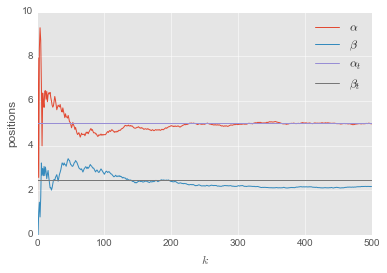

4.969409930825474 2.1621554383456547


In [96]:
plot_maximize_log_likelihood(positions, alpha_t, beta_t)

In [97]:
print(alpha_t)
print(beta_t)

5.022
2.436
